In [135]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [136]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [137]:
NUM_CLASSES = 29

# Dataset reading

In [138]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [139]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [141]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [142]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 29)                319       
                                                                 
Total params: 1389 (5.43 KB)
Trainable params: 1389 (5.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [144]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [145]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/21 [>.............................] - ETA: 8s - loss: 3.4158 - accuracy: 0.0312
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
21/21 [==============================] - 1s 11ms/step - loss: 3.3717 - accuracy: 0.0298 - val_loss: 3.3378 - val_accuracy: 0.0344
Epoch 2/1000
 1/21 [>.............................] - ETA: 0s - loss: 3.3469 - accuracy: 0.0078
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
21/21 [==============================] - 0s 6ms/step - loss: 3.3333 - accuracy: 0.0558 - val_loss: 3.3038 - val_accuracy: 0.0962


C:\Users\Michal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/1000
 1/21 [>.............................] - ETA: 0s - loss: 3.3396 - accuracy: 0.0391
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
21/21 [==============================] - 0s 5ms/step - loss: 3.2994 - accuracy: 0.0768 - val_loss: 3.2500 - val_accuracy: 0.1271
Epoch 4/1000
 1/21 [>.............................] - ETA: 0s - loss: 3.2855 - accuracy: 0.0703
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
21/21 [==============================] - 0s 5ms/step - loss: 3.2484 - accuracy: 0.0894 - val_loss: 3.1758 - val_accuracy: 0.1420
Epoch 5/1000
 1/21 [>.............................] - ETA: 0s - loss: 3.1870 - accuracy: 0.1016
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
21/21 [==============================] - 0s 6ms/step - loss: 3.1849 - accuracy: 0.1028 - val_loss: 3.0899 - val_accuracy: 0.1523
Epoch 6/1000
 1/21 [>.............................] - ETA: 0s - loss: 3.1450 - accuracy: 0.1094
E

In [146]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.8969


In [147]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [148]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 42ms/step
[2.2534147e-19 3.1826777e-11 3.9477799e-20 2.4445891e-08 3.5427590e-12
 8.0145186e-01 2.1712985e-20 1.1679546e-05 5.6431451e-09 6.3062834e-24
 1.0256196e-16 4.6226084e-10 6.0967845e-28 1.3936852e-26 1.0361481e-10
 7.6891689e-07 1.1442489e-08 1.9853564e-01 3.7455558e-23 6.7007591e-21
 7.2038585e-27 9.9397761e-09 1.1097405e-19 3.4722549e-27 1.1263604e-20
 3.7829892e-24 5.9061428e-35 3.4193558e-23 0.0000000e+00]
5


# Confusion matrix

28/28 [==============================] - 0s 704us/step


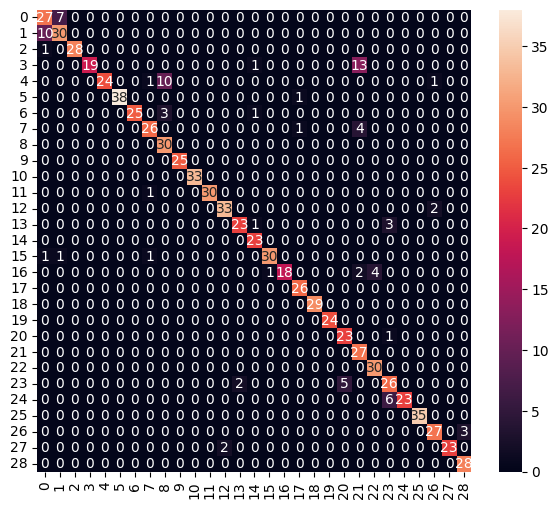

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.79      0.74        34
           1       0.79      0.75      0.77        40
           2       1.00      0.97      0.98        29
           3       1.00      0.58      0.73        33
           4       1.00      0.67      0.80        36
           5       1.00      0.97      0.99        39
           6       1.00      0.86      0.93        29
           7       0.90      0.84      0.87        31
           8       0.70      1.00      0.82        30
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        33
          11       1.00      0.97      0.98        31
          12       0.94      0.94      0.94        35
          13       0.92      0.85      0.88        27
          14       0.88      1.00      0.94        23
          15       0.97      0.91      0.94        33
          16       1.00      0.72      0.84        25
     

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [150]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Michal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [151]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Michal\AppData\Local\Temp\tmpfp_5qqat\assets


INFO:tensorflow:Assets written to: C:\Users\Michal\AppData\Local\Temp\tmpfp_5qqat\assets


7708

# Inference test

In [152]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [153]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [154]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [155]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [156]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2534176e-19 3.1826753e-11 3.9477689e-20 2.4445919e-08 3.5427561e-12
 8.0145276e-01 2.1712845e-20 1.1679537e-05 5.6431406e-09 6.3062420e-24
 1.0256206e-16 4.6226045e-10 6.0967912e-28 1.3936818e-26 1.0361452e-10
 7.6891547e-07 1.1442502e-08 1.9853473e-01 3.7455453e-23 6.7007409e-21
 7.2038393e-27 9.9397868e-09 1.1097416e-19 3.4722460e-27 1.1263616e-20
 3.7829931e-24 5.9061497e-35 3.4193596e-23 0.0000000e+00]
5
